House Price Prediction

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv('housing.csv')
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4562,-118.26,34.06,15.0,326.0,123.0,490.0,105.0,1.4886,175000.0,<1H OCEAN
8321,-118.29,33.95,31.0,2839.0,792.0,2390.0,729.0,2.0000,109800.0,<1H OCEAN
8392,-118.36,33.97,19.0,4651.0,1281.0,2917.0,1121.0,2.6823,142500.0,<1H OCEAN
19774,-122.23,39.95,21.0,2087.0,382.0,888.0,361.0,2.2070,86400.0,INLAND
20093,-120.12,38.12,37.0,3355.0,666.0,338.0,136.0,2.0625,88900.0,INLAND
4716,-118.38,34.06,28.0,2522.0,616.0,991.0,574.0,3.1475,362500.0,<1H OCEAN
4160,-118.18,34.11,33.0,1523.0,391.0,753.0,298.0,2.6591,183800.0,<1H OCEAN
9208,-119.68,37.19,10.0,3113.0,589.0,1508.0,512.0,2.8167,96100.0,INLAND
13679,-117.24,34.04,4.0,4289.0,682.0,1981.0,705.0,5.3366,165100.0,INLAND
4994,-118.29,33.99,46.0,2608.0,636.0,1766.0,596.0,1.5846,114800.0,<1H OCEAN


convert strings to numeric (ocean_proximity)

In [43]:
# To check null values
data.info()

# total_bedroom values missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
# drop null values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [45]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [47]:
# Join X_train and y_train to calculate correlation
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12226,-116.92,33.63,18.0,397.0,89.0,239.0,80.0,2.8125,INLAND,143800.0
20071,-120.38,37.99,36.0,2864.0,603.0,1155.0,565.0,2.3571,INLAND,113400.0
14275,-117.13,32.70,42.0,1210.0,292.0,945.0,258.0,0.8991,NEAR OCEAN,78900.0
10901,-117.83,33.74,23.0,1818.0,522.0,958.0,485.0,2.6771,<1H OCEAN,131500.0
223,-122.20,37.80,52.0,1547.0,293.0,706.0,268.0,4.7721,NEAR BAY,217100.0
...,...,...,...,...,...,...,...,...,...,...
1503,-122.05,37.95,22.0,5175.0,1213.0,2804.0,1091.0,2.8500,NEAR BAY,144600.0
17550,-121.87,37.35,52.0,1557.0,424.0,1580.0,434.0,2.3277,<1H OCEAN,183700.0
2570,-124.14,40.77,27.0,3046.0,605.0,1407.0,571.0,2.9143,NEAR OCEAN,99600.0
12649,-121.47,38.51,52.0,20.0,4.0,74.0,9.0,3.6250,INLAND,80000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

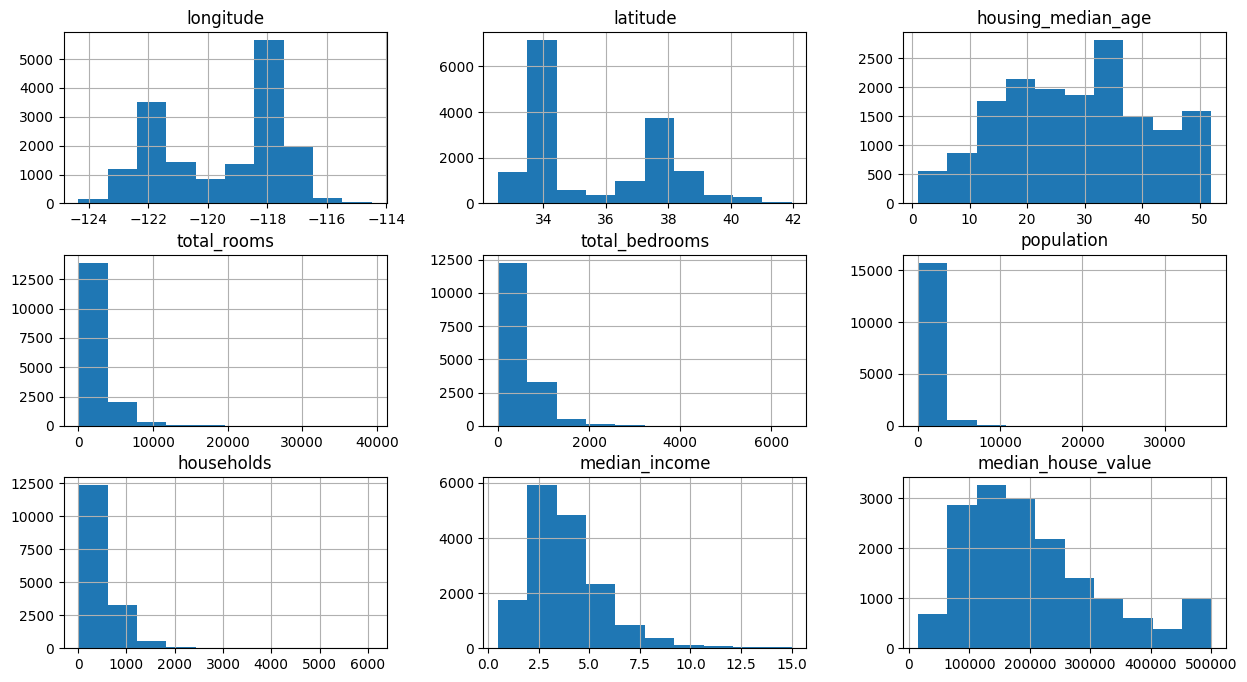

In [48]:
train_data.hist(figsize=(15,8))

<Axes: >

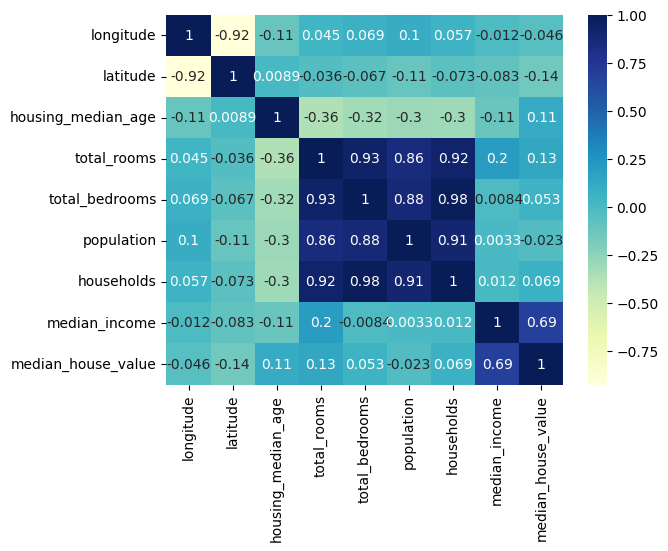

In [49]:
train_sample = train_data.drop(['ocean_proximity'], axis=1)
plt.Figure(figsize=(15,8))
sns.heatmap(train_sample.corr(), annot=True, cmap='YlGnBu')

Median_income highly correlates

Apply logs for sample values which are not proper Guassaian distribution
ex:- total_rooms, total_bedrooms etc..

In [50]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

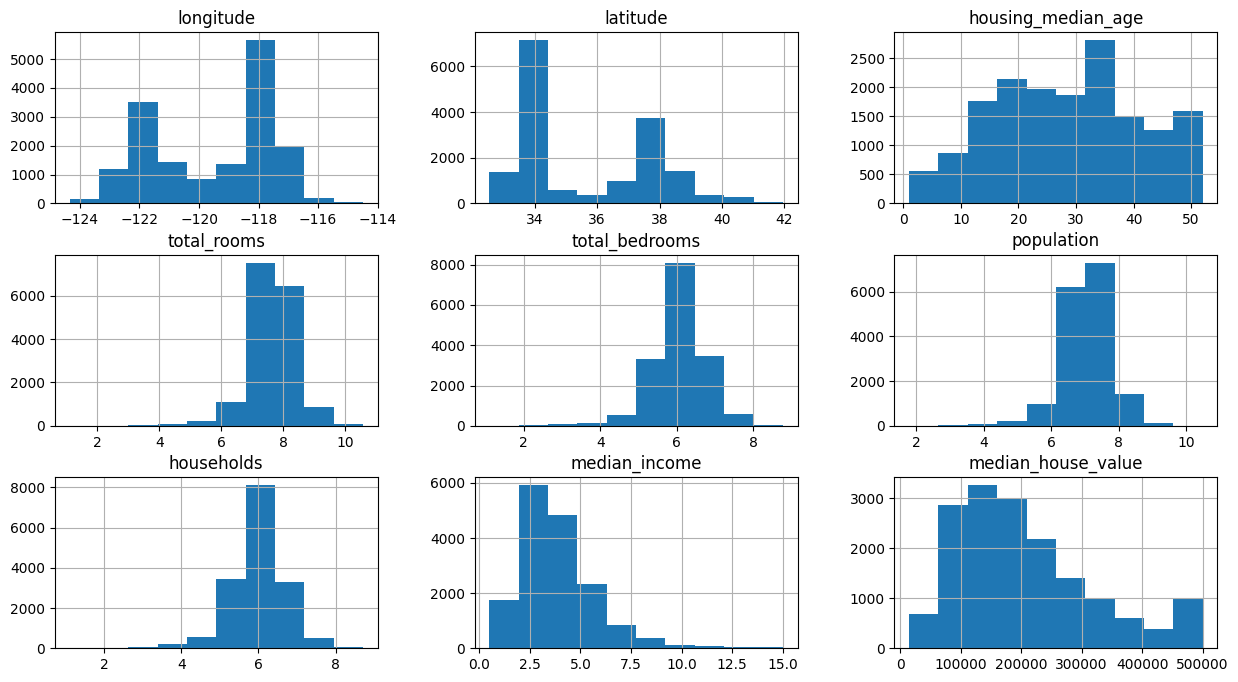

In [51]:
train_data.hist(figsize=(15,8))

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 12226 to 1345
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   ocean_proximity     16346 non-null  object 
 9   median_house_value  16346 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


convert ocean_proximity to numerical values

In [53]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7228
INLAND        5191
NEAR OCEAN    2098
NEAR BAY      1827
ISLAND           2
Name: count, dtype: int64

In [54]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

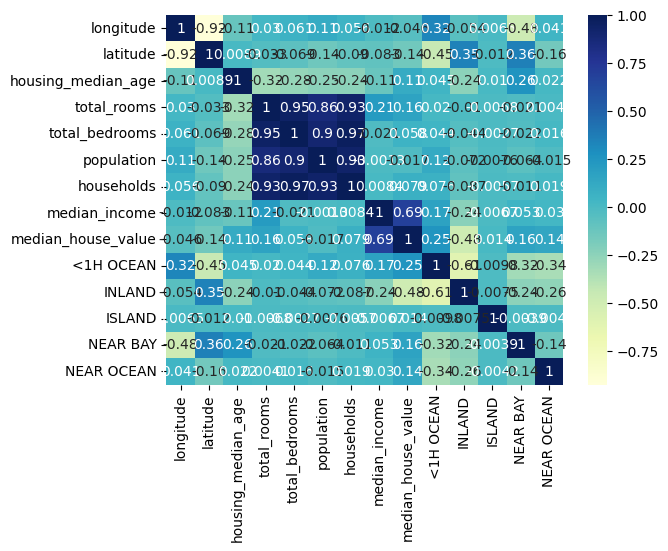

In [55]:
plt.Figure(figsize=(30,30))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

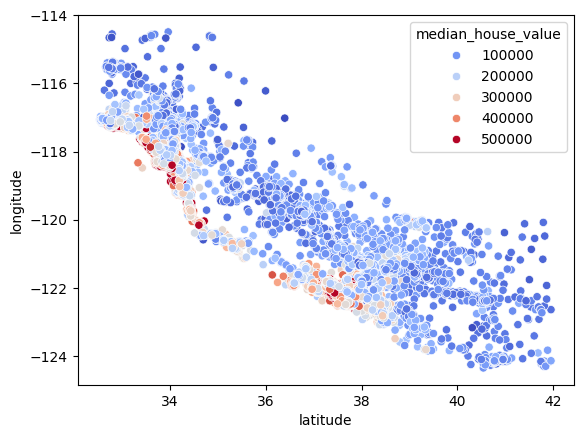

In [56]:
plt.Figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

Near to coast, house pricing is expensive

Feature Engineering (Creating new features using exisitng ones)

In [57]:
#how many rooms are bedrooms
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

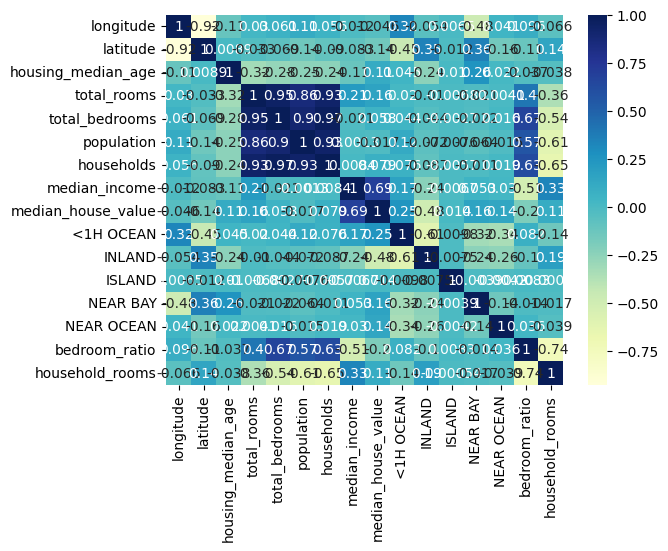

In [58]:
plt.Figure(figsize=(30,30))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

Linear Regression model

In [59]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [60]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [61]:
reg.score(X_test,y_test)

0.6634906846527251

RandomForest

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
forest.score(X_test,y_test)

0.805391235194488

Aim for higher prediction using Gridsearch

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
best_estim_model = grid_search.best_estimator_
best_estim_model.score(X_test,y_test)

0.8075138420237767